In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# EDA

In [2]:
df = pd.read_csv('maindata.csv')

In [3]:
df.info

<bound method DataFrame.info of        Unnamed: 0  artist_name                              title  \
0               0       Halsey                         Without Me   
1               1       Halsey                             Colors   
2               2       Halsey                        Bad at Love   
3               3       Halsey                          Nightmare   
4               4       Halsey                              Sorry   
...           ...          ...                                ...   
30986         292  Nicki Minaj                     My Heart 2 You   
30987         293  Nicki Minaj  Pound the Alarm (Kitz Looper mix)   
30988         294  Nicki Minaj                             Mashup   
30989         295  Nicki Minaj                       Money Hungry   
30990         296  Nicki Minaj                             Go Off   

                                 album  \
0             Manic (Target Exclusive)   
1            BADLANDS (Deluxe Edition)   
2            

In [4]:
df.dtypes
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.isna().sum()

artist_name        0
title              0
album              0
lyrics           251
date           13381
url                0
dtype: int64

In [6]:
df['lyrics'] = df['lyrics'].fillna(value='')

In [7]:
def remove_punct(s):
    new_lyr = re.sub(r'[^\w\s]', '', s).lower()
    new_lyr = re.sub(r'[\n]', ' ', new_lyr).lower()
    return new_lyr

df.lyrics = df.lyrics.apply(remove_punct)

In [8]:
df["lyrics_len"] = [len(x) for x in df["lyrics"]]

In [9]:
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/rute/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['without_stopwords'] = df.apply(lambda x : ' '.join([w for w in x['lyrics'].split(' ') if w not in stop_words]), axis = 1)

In [11]:
new_df = df[df.lyrics_len != 0]
new_df = new_df[new_df.lyrics != "Instrumental"]
new_df

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...
...,...,...,...,...,...,...,...,...
30986,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...
30987,Nicki Minaj,Pound the Alarm (Kitz Looper mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...
30988,Nicki Minaj,Mashup,---,bingiling gyal with okra body to the front of ...,NaN,https://genius.com/Nicki-minaj-mashup-lyrics,54,bingiling gyal okra body front line
30989,Nicki Minaj,Money Hungry,---,lyrics not confirmed,2016-07-01,https://genius.com/Nicki-minaj-money-hungry-ly...,20,lyrics confirmed


In [12]:
q_low = new_df['lyrics_len'].quantile(0.02)
q_hi  = new_df['lyrics_len'].quantile(0.99)

df_filtered = new_df[(new_df['lyrics_len'] < q_hi) & (new_df['lyrics_len'] > q_low)]
df_filtered#.to_csv('df_filtered.csv')

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...
...,...,...,...,...,...,...,...,...
30983,Nicki Minaj,Roman’s Revenge Alternate Version (I FEEL PRETTY),---,i feel pretty x3 and witty and gay and i pity ...,2010-09-06,https://genius.com/Nicki-minaj-romans-revenge-...,2841,feel pretty x3 witty gay pity girl isnt tonigh...
30984,Nicki Minaj,Pound the Alarm (Liam Keegan mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...
30985,Nicki Minaj,Mi Casa,---,i got dhat hard gucc u know dese bitches eazy ...,NaN,https://genius.com/Nicki-minaj-mi-casa-lyrics,540,got dhat hard gucc u know dese bitches eazy go...
30986,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...


In [13]:
#describing lyrics len by artist

artist_word_len = pd.DataFrame()

artist_word_len["words_avg"] = df_filtered.groupby(["artist_name"])["lyrics_len"].mean()
artist_word_len["words_min"] = df_filtered.groupby(["artist_name"])["lyrics_len"].min()
artist_word_len["words_max"] = df_filtered.groupby(["artist_name"])["lyrics_len"].max()

In [14]:
artist_word_len.sort_values(by="words_max")

,words_avg,words_min,words_max
artist_name,,,
Kadhja Bonet,744.125000,239,1199
Lisa Gerrard,673.230769,296,1228
Billie Marten,848.129032,476,1234
Anna Calvi,667.018868,211,1376
Nadine Shah,690.775000,210,1405
...,...,...,...
Jennifer Lopez,1990.695431,142,3433
Mariah Carey,1687.771084,160,3435
Janelle Monáe,1539.425287,194,3436


In [15]:
artist_word_len.to_csv("artist_len.csv")

(array([ 410.,  733., 1389., 1936., 2464., 2611., 2663., 2494., 2449.,
        2241., 1857., 1608., 1262., 1120.,  927.,  727.,  578.,  434.,
         376.,  276.,  245.,  165.,  138.,   74.,   83.]),
 array([ 138.  ,  270.24,  402.48,  534.72,  666.96,  799.2 ,  931.44,
        1063.68, 1195.92, 1328.16, 1460.4 , 1592.64, 1724.88, 1857.12,
        1989.36, 2121.6 , 2253.84, 2386.08, 2518.32, 2650.56, 2782.8 ,
        2915.04, 3047.28, 3179.52, 3311.76, 3444.  ]),
 <a list of 25 Patch objects>)

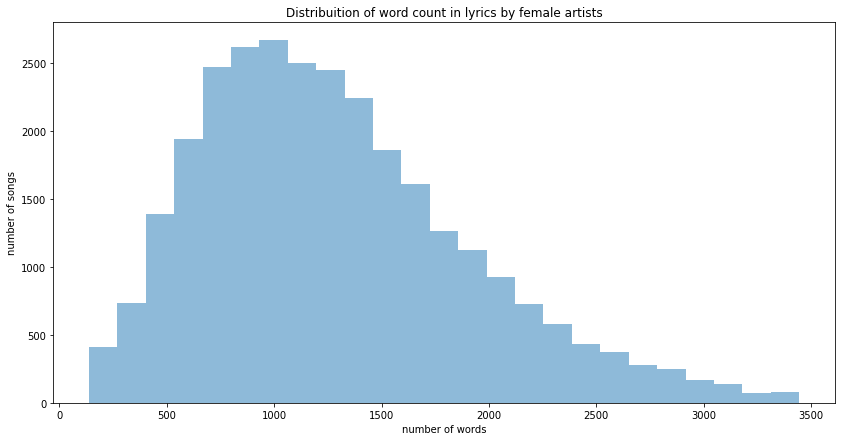

In [16]:
fig, ax = plt.subplots(figsize = (14, 7))

#plt.hist(artist_word_len["words_avg"], alpha = 0.5)
#plt.hist(artist_word_len["words_min"], alpha = 0.5)
#plt.hist(artist_word_len["words_max"], alpha = 0.5)
plt.title("Distribuition of word count in lyrics by female artists")
plt.xlabel("number of words")
plt.ylabel("number of songs")
plt.hist(df_filtered['lyrics_len'], bins = 25, alpha=0.5)

# NLP

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rute/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
tokens = nltk.word_tokenize(df_filtered['without_stopwords'][2])
print ('From: ', df_filtered['without_stopwords'][2])
print('\nTo: ', tokens) #tokens is a beauuuuutiful list

df_filtered['tokens'] = df_filtered['without_stopwords'].apply(nltk.word_tokenize) # THIS IS THE MOST EFFICIENT

From:  got boy back home michigan tastes like jack im kissing told never really liked friends hes gone hes calling bitch theres guy lives garden state told wed make til graduate told music would worth wait wants kitchen dinner plate  believe believe believe believe meant jealousy jealousy jealousy jealousy get best look dont mean frustrate always make mistakes yeah always make mistakes cause  im bad love oohooh cant blame tryin know id lyin sayin one oohooh could finally fix lookin history im bad love  got girl california eyes thought could really one time never got chance make mine fell love little thin white lines london girl attitude never told one look cute got way better things always think im riding  believe believe believe believe im deep jealousy jealousy jealousy jealousy get best look dont mean frustrate always make mistakes yeah always make mistakes cause  im bad love oohooh cant blame tryin know id lyin sayin one oohooh could finally fix lookin history im bad love  oh know 

/home/rute/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
df_filtered

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords,tokens
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...,"[found, heart, broke, filled, cup, overflowed,..."
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...,"[little, brother, never, tells, loves, said, m..."
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...,"[got, boy, back, home, michigan, tastes, like,..."
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...,"[lay, sleep, pray, lord, soul, keep, shall, di..."
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...,"[ive, missed, calls, months, seems, dont, real..."
...,...,...,...,...,...,...,...,...,...
30983,Nicki Minaj,Roman’s Revenge Alternate Version (I FEEL PRETTY),---,i feel pretty x3 and witty and gay and i pity ...,2010-09-06,https://genius.com/Nicki-minaj-romans-revenge-...,2841,feel pretty x3 witty gay pity girl isnt tonigh...,"[feel, pretty, x3, witty, gay, pity, girl, isn..."
30984,Nicki Minaj,Pound the Alarm (Liam Keegan mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...,"[oh, oh, oh, come, fill, glass, little, bout, ..."
30985,Nicki Minaj,Mi Casa,---,i got dhat hard gucc u know dese bitches eazy ...,NaN,https://genius.com/Nicki-minaj-mi-casa-lyrics,540,got dhat hard gucc u know dese bitches eazy go...,"[got, dhat, hard, gucc, u, know, dese, bitches..."
30986,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...,"[hook, hey, going, leaving, said, would, till,..."


## Stemming

In [20]:
ps = PorterStemmer ()
#print([ps.stem(w) for w in tokens])

## Apply per review
df_filtered['stemmed'] = df_filtered.apply(lambda x : [ps.stem(l) for l in x['tokens']], axis = 1)

/home/rute/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
df_filtered

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords,tokens,stemmed
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...,"[found, heart, broke, filled, cup, overflowed,...","[found, heart, broke, fill, cup, overflow, too..."
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...,"[little, brother, never, tells, loves, said, m...","[littl, brother, never, tell, love, said, moth..."
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...,"[got, boy, back, home, michigan, tastes, like,...","[got, boy, back, home, michigan, tast, like, j..."
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...,"[lay, sleep, pray, lord, soul, keep, shall, di...","[lay, sleep, pray, lord, soul, keep, shall, di..."
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...,"[ive, missed, calls, months, seems, dont, real...","[ive, miss, call, month, seem, dont, realiz, m..."
...,...,...,...,...,...,...,...,...,...,...
30983,Nicki Minaj,Roman’s Revenge Alternate Version (I FEEL PRETTY),---,i feel pretty x3 and witty and gay and i pity ...,2010-09-06,https://genius.com/Nicki-minaj-romans-revenge-...,2841,feel pretty x3 witty gay pity girl isnt tonigh...,"[feel, pretty, x3, witty, gay, pity, girl, isn...","[feel, pretti, x3, witti, gay, piti, girl, isn..."
30984,Nicki Minaj,Pound the Alarm (Liam Keegan mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...,"[oh, oh, oh, come, fill, glass, little, bout, ...","[oh, oh, oh, come, fill, glass, littl, bout, g..."
30985,Nicki Minaj,Mi Casa,---,i got dhat hard gucc u know dese bitches eazy ...,NaN,https://genius.com/Nicki-minaj-mi-casa-lyrics,540,got dhat hard gucc u know dese bitches eazy go...,"[got, dhat, hard, gucc, u, know, dese, bitches...","[got, dhat, hard, gucc, u, know, dese, bitch, ..."
30986,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...,"[hook, hey, going, leaving, said, would, till,...","[hook, hey, go, leav, said, would, till, end, ..."


## Lemmatization

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/rute/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
lemmatizer = WordNetLemmatizer()
#print([lemmatizer.lemmatize(ps.stem(w)) for w in tokens])   ## defalut variable with no documentation

## Apply per review

df_filtered['lemms'] = df_filtered.apply(lambda x : [nltk.word_tokenize(w) for w in x['stemmed']], axis = 1)

['got', 'boy', 'back', 'home', 'michigan', 'tast', 'like', 'jack', 'im', 'kiss', 'told', 'never', 'realli', 'like', 'friend', 'he', 'gone', 'he', 'call', 'bitch', 'there', 'guy', 'live', 'garden', 'state', 'told', 'wed', 'make', 'til', 'graduat', 'told', 'music', 'would', 'worth', 'wait', 'want', 'kitchen', 'dinner', 'plate', 'believ', 'believ', 'believ', 'believ', 'meant', 'jealousi', 'jealousi', 'jealousi', 'jealousi', 'get', 'best', 'look', 'dont', 'mean', 'frustrat', 'alway', 'make', 'mistak', 'yeah', 'alway', 'make', 'mistak', 'caus', 'im', 'bad', 'love', 'oohooh', 'cant', 'blame', 'tryin', 'know', 'id', 'lyin', 'sayin', 'one', 'oohooh', 'could', 'final', 'fix', 'lookin', 'histori', 'im', 'bad', 'love', 'got', 'girl', 'california', 'eye', 'thought', 'could', 'realli', 'one', 'time', 'never', 'got', 'chanc', 'make', 'mine', 'fell', 'love', 'littl', 'thin', 'white', 'line', 'london', 'girl', 'attitud', 'never', 'told', 'one', 'look', 'cute', 'got', 'way', 'better', 'thing', 'alway',

/home/rute/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Bag of Words

In [24]:
# Applying BOW text featurization on the feature 'Review_Clean'
bow_vect = CountVectorizer(min_df = 15, analyzer = 'word', dtype = np.int32)
                             
bow_train = bow_vect.fit_transform(df_filtered['without_stopwords'].values)
bow_test = bow_vect.transform(df_filtered['without_stopwords'].values)

In [25]:
bow_train

<29260x8067 sparse matrix of type '<class 'numpy.int32'>'
	with 1751591 stored elements in Compressed Sparse Row format>

In [26]:
df_filtered['feature_names'] = [bow_vect.get_feature_names()

SyntaxError: unexpected EOF while parsing (<ipython-input-26-054b0580fffd>, line 1)

In [ ]:
## Without pipeline
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(bow_train, df_filtered['Label']) 

In [ ]:
## With pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipe_model = Pipeline([('vect', CountVectorizer(dtype = np.int16)),\
                     ('tfidf', TfidfTransformer()),\
                     ('clf', MultinomialNB())])